In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import os
import sys
from astropy.table import Table

$$
\alpha = -\frac{d\log S_\nu}{d\log\nu}
$$

For each source:
1. Compute the AB magnitude (B-R)_AB from the given BP and RP mags (Vega system)
2. Convert AB magnitude to flux: $\Delta\log S_\nu = -(1/2.5)(B-R)_{\mathrm{AB}}$
3. Inverse of the wavelength ratio to get frequencies: $\Delta\log\nu = \log(\lambda_R/\lambda_B)$
4. Compute alpha: $\alpha = -(\Delta\log S_\nu)/(\Delta\log\nu)$

In [4]:
def Vega_to_AB(BR_Vega, offset=-0.3250):  # offset computed from Gaia photometric zero points
    return BR_Vega + offset

In [5]:
def compute_alpha(B, R, lambda_B=505.15, lambda_R=772.62):
    """
    Compute the spectral slope alpha for a source with given BP and RP magnitudes.
    PARAMETERS:
    - B = BP magnitude (Vega system)
    - R = RP magnitude (Vega system)
    - lambda_B = wavelength (nm) of blue passband (default is the "pivot wavelength" given by Gaia)
    - lambda_R = wavelength (nm) of red passband (")
    """
    # convert given (B-R)_Vega to AB color (B-R)_AB
    BR_AB = Vega_to_AB(B-R)
    # convert AB mag to flux
    DeltalogS_nu = -(1/2.5)*BR_AB
    # frequencies
    Deltalognu = np.log10(lambda_R/lambda_B)
    # compute alpha
    alpha = -DeltalogS_nu/Deltalognu
    return alpha

In [15]:
def compute_alpha2(B, R, lambda_B=505.15, lambda_R=772.62):
    """
    Compute the spectral slope alpha for a source with given BP and RP magnitudes.
    PARAMETERS:
    - B = BP magnitude (Vega system)
    - R = RP magnitude (Vega system)
    - lambda_B = wavelength (nm) of blue passband (default is the "pivot wavelength" given by Gaia)
    - lambda_R = wavelength (nm) of red passband (")
    """
    # convert given (B-R)_Vega to AB color (B-R)_AB
    BR_AB = Vega_to_AB(B-R)
    
    alpha = BR_AB/(2.5*np.log10(lambda_R/lambda_B))

    return alpha

#### compute $\alpha$ for the quasars

In [6]:
# load catalog
quasar_fn = '/scratch/aew492/quasars/catalogs/gaia_candidates_clean.fits'
data_gaia = Table.read(quasar_fn, format='fits')
nd = len(data_gaia)
nd

1414385

In [7]:
# magnitudes
bps = data_gaia['phot_bp_mean_mag']
rps = data_gaia['phot_rp_mean_mag']

In [8]:
alphas = [compute_alpha(bps[i], rps[i]) for i in range(nd)]

Text(0.5, 1.0, 'Quasar spectral slopes')

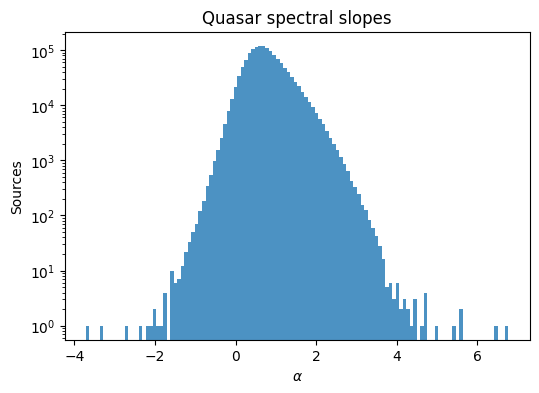

In [14]:
# plot distribution
fig, ax = plt.subplots(figsize=(6,4))

n, bins, _ = ax.hist(alphas, bins=120, alpha=0.8, histtype='stepfilled')

ax.set_yscale('log')
ax.set_xlabel(r'$\alpha$')
ax.set_ylabel('Sources')
ax.set_title('Quasar spectral slopes')

In [10]:
np.mean(alphas)

0.7731874443938453

In [11]:
np.median(alphas)

0.7104432149422706

In [12]:
bins[np.where(n==max(n))]

array([0.56505426])